<a href="https://colab.research.google.com/github/Deare-stack/GenAI/blob/main/assignment4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Deare

Date:2024/10/20

Assignment 4 ✅

In [ ]:
# Install and authenticate with Kaggle API if needed
!pip install kaggle## The Kaggle package allows to interact with Kaggle's API for downloading datasets
import os##imports Python's built-in os module, which provides functions to interact with the operating system.
import tensorflow as tf##imports the TensorFlow library under the alias tf, makes machine learning faster and easier.

In [ ]:
import kagglehub### Import the kagglehub module

### Download latest version
# Download the latest version of the dataset 'lsun_bedroom' from a data platform Kaggle.
# The dataset is identified by the username 'jhoward' and the dataset name 'lsun_bedroom'.
# The 'dataset_download' function of the 'kagglehub' module is used to download the dataset.
# The function returns the local path where the dataset files are stored after download.
path = kagglehub.dataset_download("jhoward/lsun_bedroom")
# Print the local path to the console where the dataset files have been downloaded.
# This helps verify where the dataset is stored on my local machine.
print("Path to dataset files:", path)


100%|██████████| 8.89G/8.89G [00:46<00:00, 205MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/jhoward/lsun_bedroom/versions/1


In [ ]:
!kaggle datasets download -d jhoward/lsun_bedroom##uses the Kaggle CLI to download the dataset named 'lsun_bedroom'  which is hosted under the user 'jhoward'. The '-d' option specifies the dataset.
!unzip lsun_bedroom.zip -d /content/lsun_bedroom# unzips the downloaded 'lsun_bedroom.zip' file.
# The '-d' option specifies the directory where the unzipped content will be stored.
# it is stored in the '/content/lsun_bedroom' directory of the current environment.

Streaming output truncated to the last 5000 lines.
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd5fedec227994c1816b44f2ca9f3e82c6d7443.jpg  
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd6160588fd3dc9e06b4288690d1d9ee0b541c6.jpg  
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd6c84b1a3d3db0749222146c7fa4b5311f8d9f.jpg  
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd6f96b894e3dedbcb629e7ed9f8f5b32b70581.jpg  
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd713f5f784867f8e0d6eb45af0b24e2b98dcdd.jpg  
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd7217f9d2fba8cea938a35c928741e361911fd.jpg  
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd742d13cde6954f0a18564a91c8b901be140e2.jpg  
  inflating: /content/lsun_bedroom/sample/data0/lsun/bedroom/f/b/d/fbd7a210da182506c1cde48d7585bef758056f5d.jpg  
  inflating: /content/lsun_bedroom/sa

In [ ]:
import os##imports Python's built-in os module, which provides functions to interact with the operating system.
import tensorflow as tf##imports the TensorFlow library under the alias tf, makes machine learning faster and easier.
import numpy as np
root_folder = '/content/lsun_bedroom'
# image data is in a folder called "my_dataset" in the same directory as your notebook
root_folder = '/content/lsun_bedroom'

# Load and preprocess images
images = load_images_from_folder(root_folder)

BATCH_SIZE=512
# Create a TensorFlow Dataset
train_dataset = tf.data.Dataset.from_tensor_slices(images)
train_dataset = train_dataset.batch(BATCH_SIZE)


Streaming output truncated to the last 5000 lines.
Error in reading /content/lsun_bedroom/data0/lsun/bedroom/8/f/3/8f389ab4c9d86aa9bb4b4fc36ca3e0ccd5c04e64.jpg: name 'imread' is not defined
Error in reading /content/lsun_bedroom/data0/lsun/bedroom/8/f/3/8f3851eacfcb13748b913bc6a9181e6df555d66c.jpg: name 'imread' is not defined
Error in reading /content/lsun_bedroom/data0/lsun/bedroom/8/f/3/8f3c0248a6c76d12e668fb39e08c3e42eec0ed4b.jpg: name 'imread' is not defined
Error in reading /content/lsun_bedroom/data0/lsun/bedroom/8/f/3/8f3f8b3c98137401f10395e9f5908df690cfaa66.jpg: name 'imread' is not defined
Error in reading /content/lsun_bedroom/data0/lsun/bedroom/8/f/3/8f3e4ae074126df8d17b6b5b4f38d4dc592dd7d2.jpg: name 'imread' is not defined
Error in reading /content/lsun_bedroom/data0/lsun/bedroom/8/f/3/8f3929e8aea7b41ed616b6484f7150bb9314fe33.jpg: name 'imread' is not defined
Error in reading /content/lsun_bedroom/data0/lsun/bedroom/8/f/3/8f3c48a9157f73d1ffda96479acf718d574f6f7f.jpg: name 

In [ ]:
# Define a function to load images from a given folder.
# - root_folder: the directory from which to load images.
# - img_size: the target size to which each image will be resized to (64, 64).
# - sample_size: the maximum number of images to load to 5000.
def load_images_from_folder(root_folder, img_size=(64, 64), sample_size=5000):
    images = []# List to store the loaded image data.
    valid_extensions = ('.jpg', '.jpeg', '.png', '.bmp', '.gif')# Supported image file formats.
    count = 0# Counter to track the number of images loaded.
# Traverse the directory structure rooted at 'root_folder'.
    for subdir, dirs, files in os.walk(root_folder):
        print(f"Checking directory: {subdir}, files: {len(files)}")  # Debug: Debug statement to log the current directory and file count.
        # Check if the sampled size limit has been reached.
        if count >= sample_size:
            break
        for file in files:# Process each file in the current directory.
            if file.lower().endswith(valid_extensions):# Check if the file extension is one of the supported formats.
                img_path = os.path.join(subdir, file)# Construct the full file path.
                try:# Attempt to load and preprocess the image.
                    img = imread(img_path)# Read the image from file.
                    img = resize(img, img_size, anti_aliasing=True)# Read the image from file.
                    img_normalized = (img.astype(np.float32) - 127.5) / 127.5# Normalize the image data to range [-1, 1].
                    images.append(img_normalized) # Add the normalized image data to the list.
                    count += 1
                    print(f"Loaded and processed image: {img_path}")  # Debug: Debug statement to log the successfully processed image.
                except Exception as e:# Handle exceptions (errors) that occur during the image loading process.
                    print(f"Error in reading {img_path}: {e}")
    if not images:# Check if no images were loaded and log an appropriate message.
        print("No images were loaded. Check the paths and file types.")
    return np.array(images)# Convert the list of images to a numpy array and return it.

Data loaded with shape (5, 64, 64, 3)
Displaying image 1
Displaying image 2
Displaying image 3
Displaying image 4
Displaying image 5


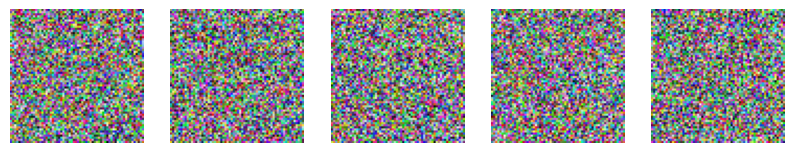

In [ ]:
# Import necessary libraries
import numpy as np# Import NumPy for numerical operations
import matplotlib.pyplot as plt# Import matplotlib.pyplot for plotting graphs

# Example to create a dummy data array with random colors
data = np.random.rand(5, 64, 64, 3)   # Generate an array of 5 random images, each 64x64 pixels with 3 color channels (RGB)

# Ensure that matplotlib graphs are displayed inline within the Jupyter Notebook itself
%matplotlib inline

# Define a function to plot a set of images from the dataset
def plot_sample_images(data, num_images=5):
    if data.size == 0: # Check if there is any data to plot
        print("No data to display. Please check data loading logs.") # Print an error message if no data is found
        return# Exit the function if no data
    # Display the shape of the data to help debug issues and understand data dimensions
    print(f"Data loaded with shape {data.shape}")  # Debug: Check data shape
# Set up the figure where images will be plotted
    plt.figure(figsize=(10, 2))# Initialize a figure for plotting with dimensions 10x2 inches
    num_images = min(num_images, len(data))# Calculate the number of images to display, which is the minimum of requested or available images
    for i in range(num_images):# Loop over each image up to the number of images to display
        print(f"Displaying image {i+1}")  # Debug: Confirm each image processed
        ax = plt.subplot(1, num_images, i + 1)# Create a subplot for each image
        plt.imshow(data[i])  # Display without normalization for testing
        plt.axis("off")# Turn off the axis labels and ticks for a cleaner look
    plt.show()# Show the plot containing all images

plot_sample_images(data)#executes the function to actually plot the images


In [ ]:
# Import necessary libraries
from tensorflow.keras import layers

# Generator Model
# Define a function to create a generator model
def make_generator_model():
   # Sequential model setup
    model = tf.keras.Sequential([
        layers.Dense(8*8*256, use_bias=False, input_shape=(100,)),# Fully connected layer that is input to the model; starts with 100 units
        layers.BatchNormalization(),# Normalize the activations of the previous layer
        layers.LeakyReLU(),# Apply Leaky ReLU for non-linearity while allowing a small gradient when the unit is inactive
        layers.Reshape((8, 8, 256)),# Reshape the output into a format that can be used in convolutional layers
        layers.Conv2DTranspose(128, (5, 5), strides=(2, 2), padding='same', use_bias=False),## Convolutional layer that upsamples the image (transpose of convolution)
        layers.BatchNormalization(),# Batch normalization to maintain stability during training
        layers.LeakyReLU(),# Apply LeakyReLU again
        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),# Another upsampling layer
        layers.BatchNormalization(),# Batch normalization
        layers.LeakyReLU(),# LeakyReLU
        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh') # Final transpose convolution layer that outputs the generated image
    ])
    return model
    ###The generator model begins with a dense layer that takes a 100-dimensional noise vector as input. It first expands this input into a higher dimensional space (2048 units)
    ###and reshapes it to start forming a spatial structure (8x8x256). Subsequent layers upsample the representation to larger spatial dimensions (16x16 and then 32x32) while reducing depth, ultimately producing a 64x64

    ##No biases in convolutional layers -  because batch normalization which negates their effect by centering the layer outputs at zero.
    ##The tanh activation function is used in the last layer of the generator - produce outputs in the range [-1,1] matching the typical normalization of image data and facilitating better learning dynamics and image contrast.
# Create the discriminator model and print its structure
generator = make_generator_model()
generator.summary();

# Discriminator Model
def make_discriminator_model():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[64, 64, 1]),# Convolutional layer as the first layer accepting images of size 64x64
        layers.LeakyReLU(),# LeakyReLU to allow gradients to flow even for negative values
        layers.Dropout(0.3),# Dropout to reduce overfitting and provide regularization
        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),# A second convolutional layer
        layers.LeakyReLU(),# LeakyReLU
        layers.Dropout(0.3),# Another Dropout
        layers.Flatten(),# Flatten the output to feed it into a dense output layer
        layers.Dense(1)# Dense layer with a single unit output to make binary classification (real or fake)
    ])
    return model

    ###Discriminator Model starts with convolutional layers designed to downsample the input image,
    ###while increasing the depth of the feature maps. Dropout layers are interspersed to help with regularization and prevent overfitting.
    ###The model concludes with a dense layer that aims to classify the input images as real or fake.


    # Create the discriminator model and print its structure
discriminator = make_discriminator_model()
discriminator.summary();


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 16384)             1638400   
                                                                 
 batch_normalization_3 (Bat  (None, 16384)             65536     
 chNormalization)                                                
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 16384)             0         
                                                                 
 reshape_1 (Reshape)         (None, 8, 8, 256)         0         
                                                                 
 conv2d_transpose_3 (Conv2D  (None, 16, 16, 128)       819200    
 Transpose)                                                      
                                                                 
 batch_normalization_4 (Bat  (None, 16, 16, 128)      

In [ ]:
import os
import tensorflow as tf
# Define the loss function for the models.
### Binary cross-entropy is used because dealing with a classification problem (real vs. fake).
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)#from_logits=True indicates that the outputs that will be fed into this function are raw predictions (logits) and not normalized by the sigmoid function.
#Discriminator Loss Function
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)# Calculates how well the discriminator identifies real images as real
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)# Calculates how well the discriminator identifies fake images as fake
    return real_loss + fake_loss# Sum the real and fake losses to get the total discriminator loss
#Generator Loss Function
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)## Generator's goal is to fool the discriminator, so its loss is based on how well it tricks the discriminator

# Setup Optimizers
# Define Adam optimizers for both the generator and the discriminator with a learning rate of 1e-5

### Adam is an optimization algorithm that can handle sparse gradients on noisy problems,
generator_optimizer = tf.keras.optimizers.Adam(1e-5)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-5)

# Setup Checkpoints for Saving and Loading Models
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)
BATCH_SIZE = 512  # Number of training examples to process before updating model parameters

@tf.function  # Use TensorFlow's graph compilation feature to improve performance
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])  # Generate random noise to feed into the generator
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:  # Record operations for automatic differentiation
        generated_images = generator(noise, training=True)  # Generate fake images from noise
        real_output = discriminator(images, training=True)  # Discriminator decision on real images
        fake_output = discriminator(generated_images, training=True)  # Discriminator decision on fake images

        gen_loss = generator_loss(fake_output)  # Calculate generator loss
        disc_loss = discriminator_loss(real_output, fake_output)  # Calculate discriminator loss

    # Calculate gradients for generator and discriminator
    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    # Apply the gradients to the respective optimizers
    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))



In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

def generate_and_save_images(model, epoch, test_input):
    # Generate images from the model using the input vector while in inference mode (training=False)
    predictions = model(test_input, training=False)

    fig = plt.figure(figsize=(10, 10))  # Setup the plot with figure size 10x10 inches
# Loop through the number of images generated
    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)  # Setup a 4x4 grid for subplotting each image
        image = (predictions[i, :, :, :] + 1) / 2  # Rescale image pixels to [0, 1] range for plotting
        plt.imshow(image)
        plt.axis('off')# Remove axes for cleaner presentation of generated images

    # Create the 'images' directory if it doesn't exist
    os.makedirs('images', exist_ok=True)
# Save the generated figure to the images directory with a filename indicating the epoch
    plt.savefig(f'images/image_at_epoch_{epoch:04d}.png')
    plt.show()
    # Initialize a random vector (seed) that will be used to visualize progression of the generator
def train(dataset, epochs, num_examples_to_generate):
    seed = tf.random.normal([num_examples_to_generate, 100]) # Initialize a random vector (seed) that will be used to visualize progression of the generator
# Train over a set number of epochs
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)# Apply the training step using the current batch of images

       # After each epoch, generate and save images
        generate_and_save_images(generator, epoch + 1, seed)

        # Save model checkpoint every 15 epochs
        if (epoch + 1) % 15 == 0:
            checkpoint.save(file_prefix=checkpoint_prefix)
            print(f'Checkpoint saved at epoch {epoch + 1}')

        print(f'Epoch {epoch + 1} completed')

# Define the number of training epochs and the number of examples to generate (to visualize progress)
EPOCHS = 200## in oder to will traning my model I have change the epochs for 200, I have tried 300 but colab kicked me out
num_examples_to_generate = 16

# Start the training process
train(train_dataset, EPOCHS, num_examples_to_generate)


# GAN model:

### I've been trying to improve the pictures my GAN model creates, but so far, they just look like noise. At first, I increased the sample size from 1,000 to 5,000 and trained the model longer, for about 300 epochs, but I got kiked out by google colab. I also kept getting kicked off Google Colab during my experiments with 300 epochs and then I have changed to the 200 epochs.




### Next, I tried adjusting the learning rates for both the discriminator and the generator to 1e-5 and increased the batch size to 512. but now I ran out of TPU credits and got disconnected again.



### If I have a chance I will continue changing the batch size and learning rate, and explore different layers, filter sizes, or activation functions to find a configuration that better suits the complexity of my data to get a perfect high-quality result picture.

# Discussion Points

## Discuss the trade-off between generating high-quality images and maintaining diversity in the output. Are the generated images too similar, or does the model capture a wide range of bedroom styles?


High-Quality Images: To achieve highly detailed and realistic images, the GAN needs to learn fine features from the training data.

1. Complex Network Structures: Using deeper or more sophisticated neural networks can help capture intricate details.
2. Focused Training: Longer training cycles or finely tuned hyperparameters help the model learn specific characteristics deeply.(in my model I have change the epochs from 50 to 200)
3. Learning Rate and Batch Size: adjusting the learning rate and batch size(in my model I have trying a learning rate of 1e-5 and a batch size of 512)
4. Layer Configurations: modifying the layer configurations in GAN model generator and discriminator.

Diversity of Output: Ensuring that the model can generate a wide range of outputs involves:

1. Generalization: The model should not just memorize training examples but learn to generate new variations.
2. Avoiding Overfitting: adding dropout layers or using data augmentation can prevent the model from just replicating training data.(I have added the droupout 0.3 to my discriminator to avoid the overffiting)


Balance the Trade-off
1. Introducing randomness in training, such as through dropout or noise layers, helps maintain output diversity.
2. Exploring different architectures


I can not directly see the similarity from my result picture,which I need to fine-tune the model more or extend the training duration like adding more epochs might around 500 or more.From the conceptural GAN model, if images look too alike, can consider adding more randomness to the training process or changing the model's architecture.


## Consider on potential enhancements to the model architecture or training process. Would experimenting with different hyperparameters or batch sizes yield better results?
1. Reducing the Learning Rate from 1e-4 to 1e-5:  A lower learning rate means that my model makes smaller adjustments to the weights during each update.
2. Increasing the Batch Size to 512: Larger batches provide more stable and reliable gradient estimates, which can make training smoother and less susceptible to the noise associated with smaller batches.model gets a better approximation of the entire dataset's distribution.
3. Increasing Epochs from 50 to 200: More training epochs give your GAN more iterations to learn and refine the generator's ability to create realistic images.Longer training allows the discriminator to become better at distinguishing real from fake, which in turn forces the generator to produce increasingly high-quality outputs.
4. Increasing Sample Size from 1000 to 5000:With a larger sample size, the generator is exposed to more varied data during training.A larger dataset reduces the risk of overfitting.

These changes led to improvements in both the stability and the effectiveness of GAN's training process.


What are the practical applications for this type of generative model?

GANs are a type of AI that can create very realistic images and data.

1. Creating New Images
Art and Design: GANs can make new artworks or design items by learning different artistic styles.
2. Entertainment and Media
Movies and Games: GANs help make realistic scenes for movies and video games, which can save time and money in production.
3. Fashion
Designing Clothes: GANs help design new fashion items by mixing current trends and historical styles.


### Extra Credit Research Problem:  Consider how you might quantitatively evaluate the quality of the generated images.
### Hint: Inception Score (IS) or Inception Distance (ID) can provide measures of image quality and diversity.


Quantitatively evaluating the quality of model GAN is crucial for determining how effectively the model is learning and generating realistic outputs.

1. Inception Score (IS)
measures both the quality and diversity of generated images.
calculate IS:IS=exp(ExKL(p(y∣x)∣∣p(y)))
the average KL divergence across all images to get the Inception Score

Quality:
Images are more realistic if the conditional label distribution p(y∣x) (predicted by a pre-trained network) is highly confident, meaning it has low entropy.

Diversity:p(y) (averaged over all generated images) should have high entropy.

How to Calculate IS:

Use a pre-trained Inception model to classify each generated image into one of the pre-defined categories. Calculate the conditional class distribution for each image.
Measure the KL divergence between the conditional distribution of each image and the marginal distribution over the whole generated dataset.
Exponentiate the average KL divergence across all images to get the Inception Score: IS=exp(ExKL(p(y∣x)∣∣p(y)))


2. Fréchet Inception Distance (FID)
The FID measures the distance between the feature vectors of real images and generated images.

How to Calculate FID:

Use a feature-extracting layer of the Inception model to convert both real and generated images into feature vectors.
Model the feature vectors of real images and generated images as multivariate Gaussian distributions, with means and covariances for real images(μ_r, Σ_r) and generate images (μg, Σg).
then use this formula to calculate the FID
FID = ||μ_r - μ_g||^2 + Tr(Σ_r + Σ_g - 2(Σ_r Σ_g)^{1/2})

